In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


# Connect to SQLite

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


# Create a sales table

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
  product TEXT,
  quantity INTEGER,
  price REAL
  )
""")


# Insert sample data

data = [
  ('Shampoo', 12, 4.50),
  ('Toothpaste', 20, 2.00),
  ('Soap', 30, 1.20),
  ('Rice (5kg bag)', 8, 12.00),
  ('Cooking Oil (1L)', 15, 5.50),
  ('Detergent Powder', 10, 6.00),
  ('Shampoo', 7, 4.50),
  ('Toothpaste', 18, 2.00),
  ('Soap', 25, 1.20),
  ('Rice (5kg bag)', 5, 12.00),
  ('Cooking Oil (1L)', 12, 5.50),
  ('Detergent Powder', 6, 6.00)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

conn.commit()

print("SQLite database 'sales_data.db' created with sample data!")


SQLite database 'sales_data.db' created with sample data!



Sales Summary:
             product  total_qty  revenue
0  Cooking Oil (1L)         27    148.5
1  Detergent Powder         16     96.0
2    Rice (5kg bag)         13    156.0
3           Shampoo         19     85.5
4              Soap         55     66.0
5        Toothpaste         38     76.0


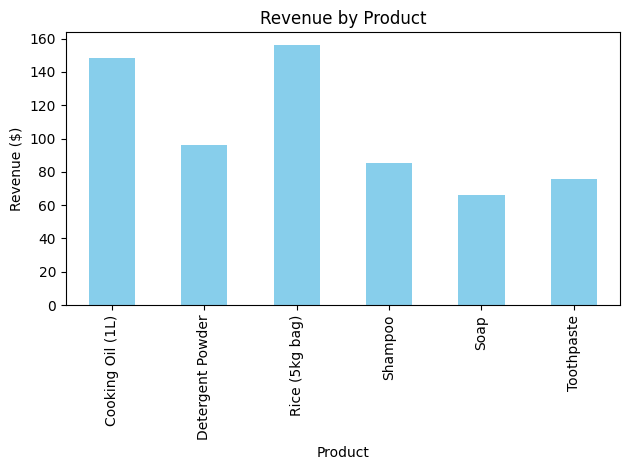

<Figure size 640x480 with 0 Axes>

In [27]:
# Run SQL query

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into pandas

df = pd.read_sql_query(query, conn)

# Display results

print("\nSales Summary:\n", df)


# Plot bar chart for revenue

df.plot(kind='bar', x='product', y='revenue', legend=False, color= 'skyblue')
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.title("Revenue by Product")
plt.tight_layout()

# Save chart
plt.savefig("sales_chart.png")
plt.show()

plt.close()
